<a href="https://colab.research.google.com/github/anhtrannguyenvan/AIO_2024_Exercise/blob/module3_finalproject/xgboost_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

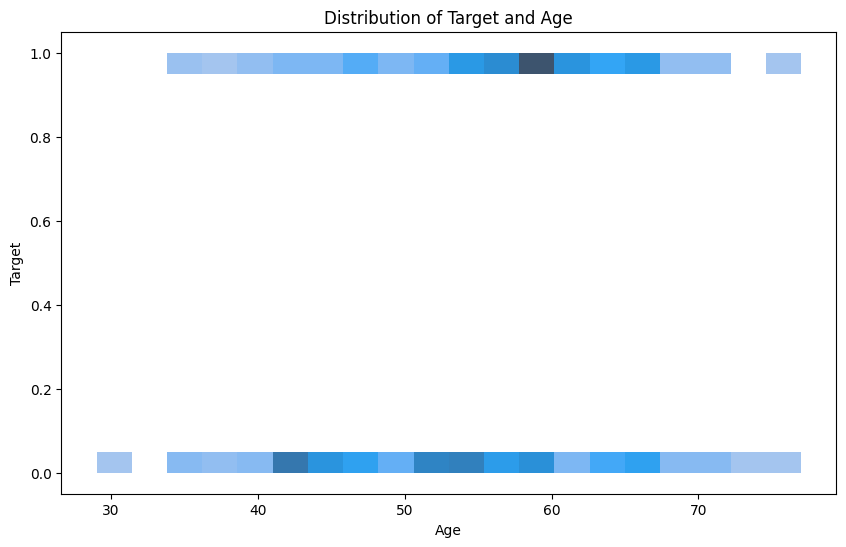

In [ ]:
#BTAP 1
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/cleveland.csv', header = None)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())
#distribution of target and age
plt.figure(figsize = (10, 6))
sns.histplot(data=df, x = 'age', y='target', multiple='stack', bins =20, kde=True)
plt.xlabel('Age')
plt.ylabel('Target')
plt.title('Distribution of Target and Age')
##plt.legend(title='Target', label=['Negative','Positive'])
plt.show()

<ipython-input-9-72ca899ed5e1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='target', y='age', palette='viridis')


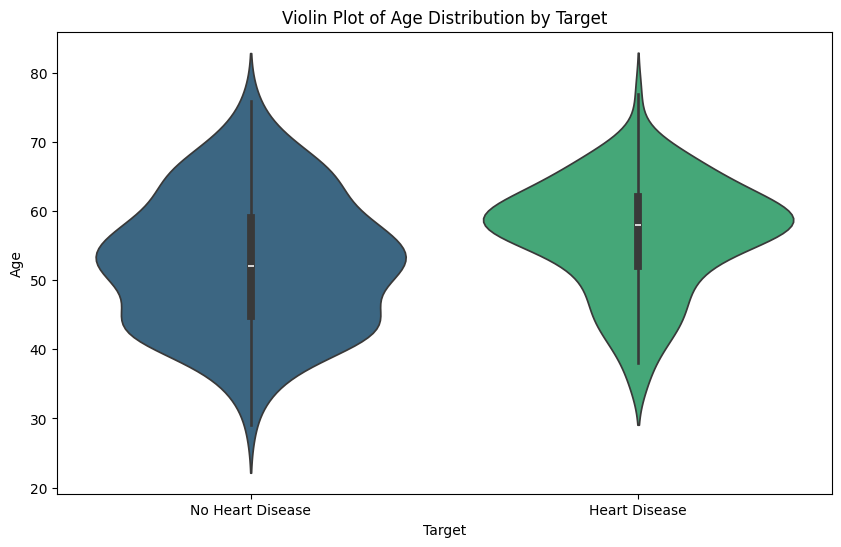

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='target', y='age', palette='viridis')
plt.title('Violin Plot of Age Distribution by Target')
plt.xlabel('Target')
plt.ylabel('Age')
plt.xticks(ticks=[0, 1], labels=['No Heart Disease', 'Heart Disease'])
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


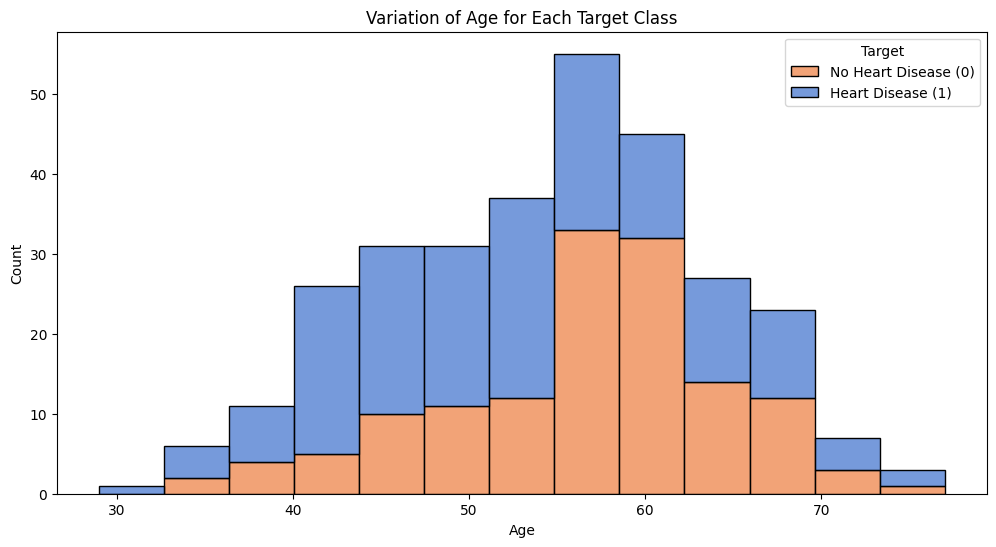

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='age', hue='target', multiple='stack', palette='muted')
plt.title('Variation of Age for Each Target Class')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Target', labels=['No Heart Disease (0)', 'Heart Disease (1)'])
plt.show()

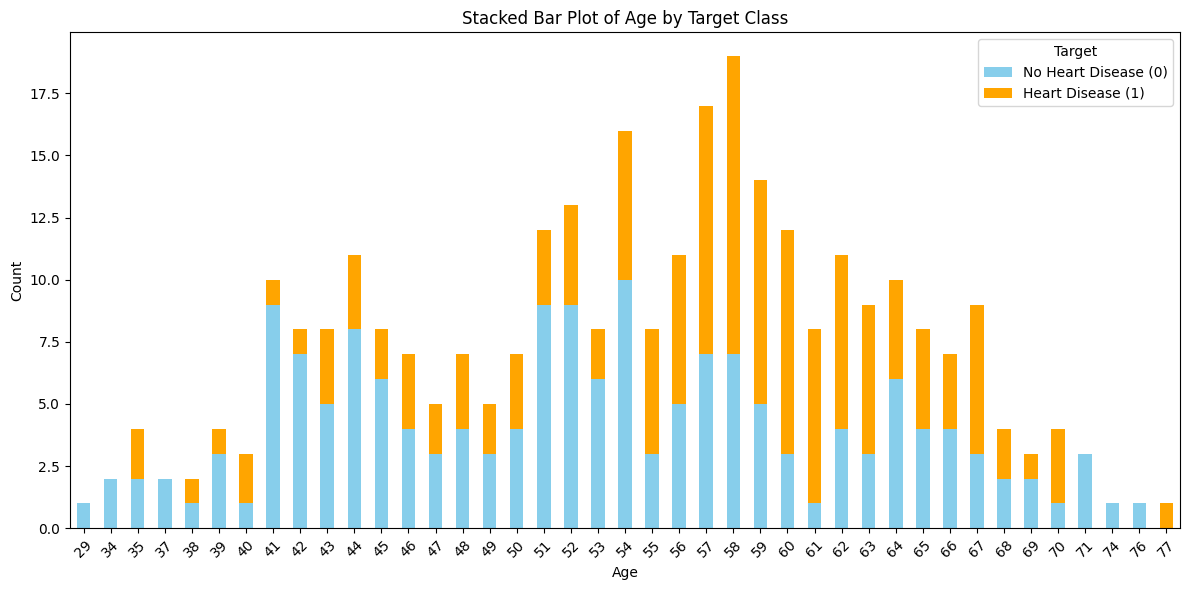

In [ ]:
# Create a DataFrame for counts of each target class by age
age_counts = df.groupby(['age', 'target']).size().unstack(fill_value=0)

# Plotting the stacked bar chart
age_counts.plot(kind='bar', stacked=True, figsize=(12, 6), color=['skyblue', 'orange'])
plt.title('Stacked Bar Plot of Age by Target Class')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Target', labels=['No Heart Disease (0)', 'Heart Disease (1)'])
plt.tight_layout()  # Adjust layout for better fit
plt.show()

In [ ]:
#BTAP3
# Thêm import cho KNN và các phương thức đánh giá
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

X = df.iloc[:, :-1].values  # Lấy tất cả các cột trừ cột cuối
y = df.iloc[:, -1].values    # Lấy cột cuối cùng là target

# 5. Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Huấn luyện và biến đổi dữ liệu huấn luyện
X_test = scaler.transform(X_test)         # Chỉ biến đổi dữ liệu kiểm tra

# 7. Khởi tạo mô hình KNN
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski')

# 8. Huấn luyện mô hình
knn.fit(X_train, y_train)

# 9. Dự đoán trên tập kiểm tra
y_pred = knn.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[27  2]
 [ 3 29]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92        29
           1       0.94      0.91      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



In [ ]:
cm_train = confusion_matrix(y_train, knn.predict(X_train))  # Predict on training data
cm_test = confusion_matrix(y_test, y_pred)  # This line was correct

In [ ]:
accuracy_for_train = np.round((cm_train[0][0]+cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0]+cm_test[1][1])/len(y_test),2)
print('Accuracy for training set for KNeighborsClassifier = {} '.format(accuracy_for_train))
print('Accuracy for test set for KNeighborsClassifier= {} '.format(accuracy_for_test))

Accuracy for training set for KNeighborsClassifier = 0.89 
Accuracy for test set for KNeighborsClassifier= 0.92 


In [ ]:
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)
train_accuracy = svm_model.score(X_train, y_train)
test_accuracy = svm_model.score(X_test, y_test)

print(f'Accuracy for train = {train_accuracy:.2f}')
print(f'Accuracy for test = {test_accuracy:.2f}')

Accuracy for train = 0.90
Accuracy for test = 0.90


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# 1. Tải dữ liệu
df = pd.read_csv('/content/cleveland.csv', header=None)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang',
              'oldpeak', 'slope', 'ca', 'thal', 'target']

# 2. Chuyển đổi nhãn mục tiêu
df['target'] = df['target'].map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

# 3. Xử lý các giá trị thiếu
df['thal'] = df['thal'].fillna(df['thal'].mean())
df['ca'] = df['ca'].fillna(df['ca'].mean())

# 4. Chia dữ liệu thành các biến độc lập (X) và biến phụ thuộc (y)
X = df.iloc[:, :-1].values  # Lấy tất cả các cột trừ cột cuối
y = df.iloc[:, -1].values    # Lấy cột cuối cùng là target

# 5. Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Huấn luyện và biến đổi dữ liệu huấn luyện
X_test = scaler.transform(X_test)         # Chỉ biến đổi dữ liệu kiểm tra

# 7. Khởi tạo mô hình SVM
svm_model = SVC(kernel='rbf', random_state=42)

# 8. Huấn luyện mô hình
svm_model.fit(X_train, y_train)

# 9. Dự đoán trên tập kiểm tra
y_pred = svm_model.predict(X_test)

# 10. Đánh giá mô hình
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 11. Tính độ chính xác cho tập huấn luyện và kiểm tra
train_accuracy = svm_model.score(X_train, y_train)
test_accuracy = svm_model.score(X_test, y_test)

print(f'Accuracy for train = {train_accuracy:.2f}')
print(f'Accuracy for test = {test_accuracy:.2f}')


Confusion Matrix:
[[27  2]
 [ 4 28]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

Accuracy for train = 0.90
Accuracy for test = 0.90


In [ ]:
from sklearn.naive_bayes import GaussianNB
#Khởi tạo mô hình Naive Bayes
nb_model = GaussianNB()

#Huấn luyện mô hình
nb_model.fit(X_train, y_train)
#Tính độ chính xác cho tập huấn luyện và kiểm tra
train_accuracy = nb_model.score(X_train, y_train)
test_accuracy = nb_model.score(X_test, y_test)

print(f'Accuracy for train = {train_accuracy:.2f}')
print(f'Accuracy for test = {test_accuracy:.2f}')

Accuracy for train = 0.85
Accuracy for test = 0.84


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=2)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

train_accuracy = dt_model.score(X_train, y_train)
test_accuracy = dt_model.score(X_test, y_test)

print(f'Accuracy for train = {train_accuracy:.2f}')
print(f'Accuracy for test = {test_accuracy:.2f}')

Accuracy for train = 1.00
Accuracy for test = 0.75


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(criterion='gini', max_depth=10,
                                  min_samples_split=2, n_estimators=10, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

train_accuracy = rf_model.score(X_train, y_train)
test_accuracy = rf_model.score(X_test, y_test)

print(f'Accuracy for train = {train_accuracy:.2f}')
print(f'Accuracy for test = {test_accuracy:.2f}')

Accuracy for train = 0.98
Accuracy for test = 0.80


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
base_estimator = DecisionTreeClassifier(max_depth=1)  # Estimator cơ bản
ada_model = AdaBoostClassifier(estimator=base_estimator, n_estimators=50,
                               learning_rate=1.0, random_state=42)

ada_model.fit(X_train, y_train)
y_pred = ada_model.predict(X_test)
train_accuracy = ada_model.score(X_train, y_train)
test_accuracy = ada_model.score(X_test, y_test)

print(f'Accuracy for train = {train_accuracy:.2f}')
print(f'Accuracy for test = {test_accuracy:.2f}')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy for train = 0.91
Accuracy for test = 0.84


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(
    learning_rate=0.1,
    n_estimators=100,
    subsample=1.0,
    min_samples_split=2,
    max_depth=3,
    random_state=42
)
gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_test)
train_accuracy = gb_model.score(X_train, y_train)
test_accuracy = gb_model.score(X_test, y_test)
print(f'Accuracy for train = {train_accuracy:.2f}')
print(f'Accuracy for test = {test_accuracy:.2f}')

Accuracy for train = 1.00
Accuracy for test = 0.85


In [ ]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(objective="binary:logistic", random_state=42, n_estimators=100)

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
train_accuracy = xgb_model.score(X_train, y_train)
test_accuracy = xgb_model.score(X_test, y_test)

print(f'Accuracy for train = {train_accuracy:.2f}')
print(f'Accuracy for test = {test_accuracy:.2f}')

Accuracy for train = 1.00
Accuracy for test = 0.87


In [ ]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier # Added import for DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier # Added import for KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC  # Added import for SVC
from sklearn.linear_model import LogisticRegression # Added import for LogisticRegression
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report


# 7. Khởi tạo các mô hình
dtc = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()
xgb = XGBClassifier(random_state=42)
gc = GradientBoostingClassifier(random_state=42)
svc = SVC(kernel='rbf', random_state=42)
ad = AdaBoostClassifier(random_state=42)

estimators = [
    ('dtc', dtc),
    ('rfc', rfc),
    ('knn', knn),
    ('xgb', xgb),
    ('gc', gc),
    ('svc', svc),
    ('ad', ad)
]

stacking_model = StackingClassifier(estimators=estimators,
                                    final_estimator=LogisticRegression())

stacking_model.fit(X_train, y_train)
y_pred = stacking_model.predict(X_test)

# 11. Đánh giá mô hình
cm_train = confusion_matrix(y_train, stacking_model.predict(X_train))
cm_test = confusion_matrix(y_test, y_pred)

print("Confusion Matrix (Test):")
print(cm_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 12. Tính độ chính xác cho tập huấn luyện và kiểm tra
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
print('Accuracy for training set for Stacking = {}'.format(accuracy_for_train))
print('Accuracy for test set for Stacking = {}'.format(accuracy_for_test))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

Confusion Matrix (Test):
[[27  2]
 [ 4 28]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

Accuracy for training set for Stacking = 0.93
Accuracy for test set for Stacking = 0.9
